# Trabajo en clase 01
## Oscilador Armónico

## Javier Fernández 2020425930


- Realice las actividades que se le indican en los espacios disponibles. 
- Debe entregar una copia de este cuaderno en el espacio habilitado el tecDigital para el trabajo en clase 01.
- **Valor total 14 puntos**.
- Puede agregar celdas de texto o código si lo considera necesario.
- Use nombres descriptivos para las variables y las funciones que defina. 
- Agregue todos los comentarios que considere necesarios para mejorar la comprensión del código.

## 1. Oscilador Armónico simple (OAS)
Considere el sistema de ecuaciones de movimiento para el oscilador armónico simple:

\begin{align}
\begin{cases}
    \dot \omega &= -\dfrac{g}{l}\theta\\
    \dot \theta &= \omega
\end{cases}
\end{align}

La solución analítica para $\theta(t)$ es:

$$
\theta(t) = \theta_0 \sin(\Omega t + \phi)
$$

donde $\Omega = \sqrt{g/l}$, $\theta_0$ es la amplitud y $\phi$ la fase.

In [102]:
# Use los siguientes parámetros y condiciones iniciales

g = 9.81         # aceleración de la gravedad terrestre
l = 1.           # longitud del péndulo
p1 = (g, l)      # tupla de parámetros
Omega = np.sqrt(g/l)

phi = np.pi/2    # ángulo de fase
theta_0 = 1.     # Amplitud
theta = 1.       # Ángulo inicial
omega = 0.       # Rapidez angular inicial

t_i = 0.         # Instante inicial
t_f = 10.        # Instante final

1. Defina una función ejecute las ecuaciones de movimiento del OAS para resolver mediante `solve_ivp()`. **Valor: 1 punto**

In [65]:
# Ecuaciones de movimiento

def Oscilador_Armonico(t, estado, g, l):
    """
    Función del sistema de ecuaciones de un oscilador armónico simple
    """
    theta, omega = estado

    domega = -(g*theta)/l
    
    dtheta = omega
    
    return [dtheta,domega]

# Solución Analítica

def Solucion_Analitica(t,Omega,theta_0,phi):
    return theta_0*np.sin(Omega*t+phi)

def Solucion_Analitica_omega(t,Omega,theta_0,phi):
    return theta_0*Omega*np.cos(Omega*t+phi)

2. Resuelva el sistema numéricamente. Usando los resultados obtenidos genere una gráfica $\theta~vs~t$. Compare con la solución analítica del sistema. Agregue y modifique todos los elementos necesarios para mejorar la comprensión del gráfico. **Valor: 2 puntos**


3. Genere una gráfica $\omega~vs~t$. Compare con la solución analítica del sistema. Agregue y modifique todos los elementos necesarios para mejorar la comprensión del gráfico. **Valor: 2 puntos**

<function matplotlib.pyplot.show(close=None, block=None)>

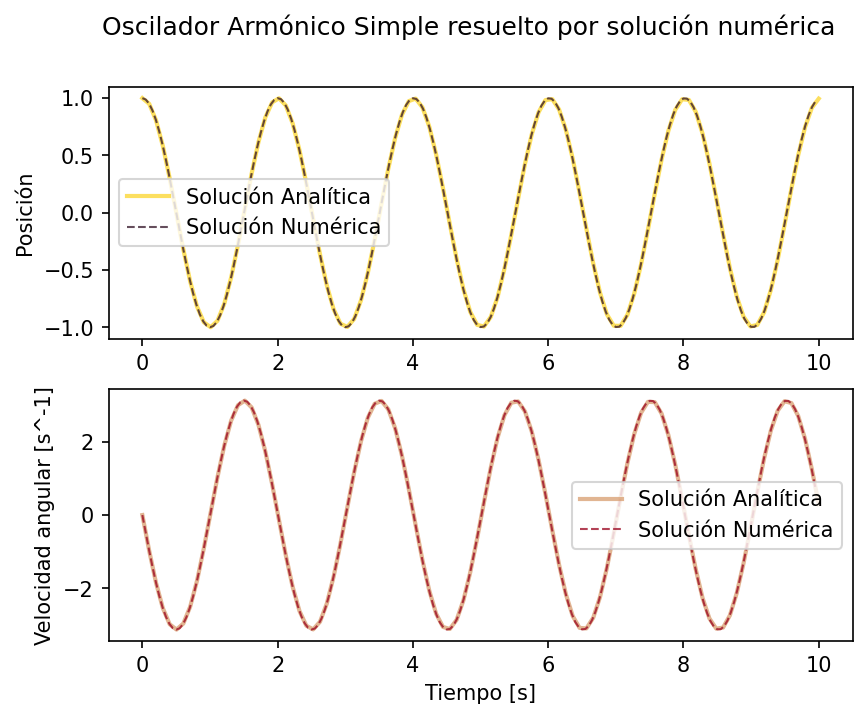

In [83]:
# Gráficos theta vs t y omega vs t

## Se resuelve la ecuación numéricamente por solve_ivp

cond_iniciales=[ theta, omega]

t_span = (t_i,t_f)
t_eval = np.arange(t_i,t_f,0.05)


result_solve_ivp = solve_ivp(Oscilador_Armonico, t_span, y0=cond_iniciales, t_eval=t_eval, args=p1)


#print(result_solve_ivp)


## Solución Analítica

t_analitica = np.linspace(t_i,t_f,100)
theta_analitica = Solucion_Analitica(t_analitica, Omega,theta_0,phi )
omega_analitica = Solucion_Analitica_omega(t_analitica, Omega,theta_0,phi)


## Gráficos por solución numérica

fig, (ax, ax1) = plt.subplots(2, 1, dpi=150)

ax.plot(t_analitica,theta_analitica, label="Solución Analítica" , color="#FCDC4D", linewidth=2, alpha=0.9)
ax.plot(result_solve_ivp.t,result_solve_ivp.y[0,:], label="Solución Numérica", color="#321325", alpha=0.75,linewidth=1, linestyle="dashed")
ax.set_ylabel("Posición")
ax.legend(loc="best")


ax1.plot(t_analitica, omega_analitica, label="Solución Analítica" , color="#D89C6E", linewidth=2, alpha=0.75)
ax1.plot(result_solve_ivp.t,result_solve_ivp.y[1,:], label="Solución Numérica", color="#9A031E", alpha=0.75,linewidth=1, linestyle="dashed")
ax1.set_ylabel("Velocidad angular [s^-1]")
ax1.set_xlabel("Tiempo [s]")
ax1.legend(loc="best")


plt.suptitle("Oscilador Armónico Simple resuelto por solución numérica")
plt.show



4. Finalmente, genere el diagrama de fase del OAS, es decir, grafique $\dot\theta~vs~\theta$. Agregue y modifique todos los elementos necesarios para mejorar la comprensión del gráfico. **Valor: 2 puntos**

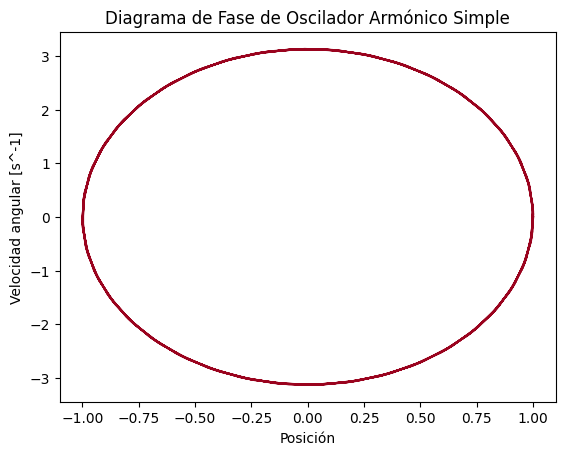

In [77]:
# Diagrama de fase


plt.plot(result_solve_ivp.y[0,:],result_solve_ivp.y[1,:], color="#9A031E")
plt.title("Diagrama de Fase de Oscilador Armónico Simple")
plt.xlabel("Posición")
plt.ylabel("Velocidad angular [s^-1]")
plt.show()

## 2. Oscilador armónico amortiguado (OAA)

En este caso se va a tomar en cuenta que la fricción a la que esta sometido el oscilador es proporcional a la rapidez.

$$
F_{fricción} = -q \dot \theta
$$

Por lo tanto, la ecuación de movimiento se expresa como:
$$
\ddot \theta = -\frac{g}{l}\theta - q \dot \theta
$$

Esta ecuación se expresa como el siguiente sistema de ecuaciones:
\begin{align}
\begin{cases}
    \dot \omega &= -\dfrac{g}{l}\theta -q\omega\\
    \dot \theta &= \omega
\end{cases}
\end{align}

1. Defina una función ejecute las ecuaciones de movimiento del OAA para resolver mediante `solve_ivp()`. **Valor: 1 punto**

In [113]:
# Ecuaciones de movimiento

def Oscilador_Armonico_Amortiguado(t, estado, g, l, q):
    """
    Función del sistema de ecuaciones de un oscilador armónico simple
    """
    theta, omega = estado

    domega = -(g*theta)/l - q*omega
    
    dtheta = omega
    
    return [dtheta,domega]


def Solucion_Analitica_Amortiguada(t,Omega,theta_0,phi,q):
    return theta_0*np.exp((-q*t)/2)*np.sin((np.sqrt(Omega**2-q**2/4))*t+phi)



def Solucion_Analitica_Amortiguada_omega(t,Omega,theta_0,phi,q):
    return theta_0*((-q*t)/2)*np.exp((-q*t)/2)*np.sin((np.sqrt(Omega**2-q**2/4))*t+phi) +theta_0*(np.sqrt(Omega**2-q**2/4))*np.exp((-q*t)/2)*np.cos((np.sqrt(Omega**2-q**2/4))*t+phi)




# Se agrega el parámetro de amortiguamiento
q = 1. # Régimen subamortiguado (Marion 3.5)

p2=(g,l,q)

2. Resuelva el sistema numéricamente. Usando los resultados obtenidos genere una gráfica $\theta~vs~t$. Compare con la solución analítica del sistema. Agregue y modifique todos los elementos necesarios para mejorar la comprensión del gráfico. **Valor: 2 puntos**
3. Genere una gráfica $\omega~vs~t$. Compare con la solución analítica del sistema. Agregue y modifique todos los elementos necesarios para mejorar la comprensión del gráfico. **Valor: 2 puntos**

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.000e-02 ...  9.900e+00  9.950e+00]
        y: [[ 1.000e+00  9.880e-01 ...  4.070e-03  4.799e-03]
            [ 0.000e+00 -4.765e-01 ...  1.604e-02  1.312e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 248
     njev: 0
      nlu: 0


<function matplotlib.pyplot.show(close=None, block=None)>

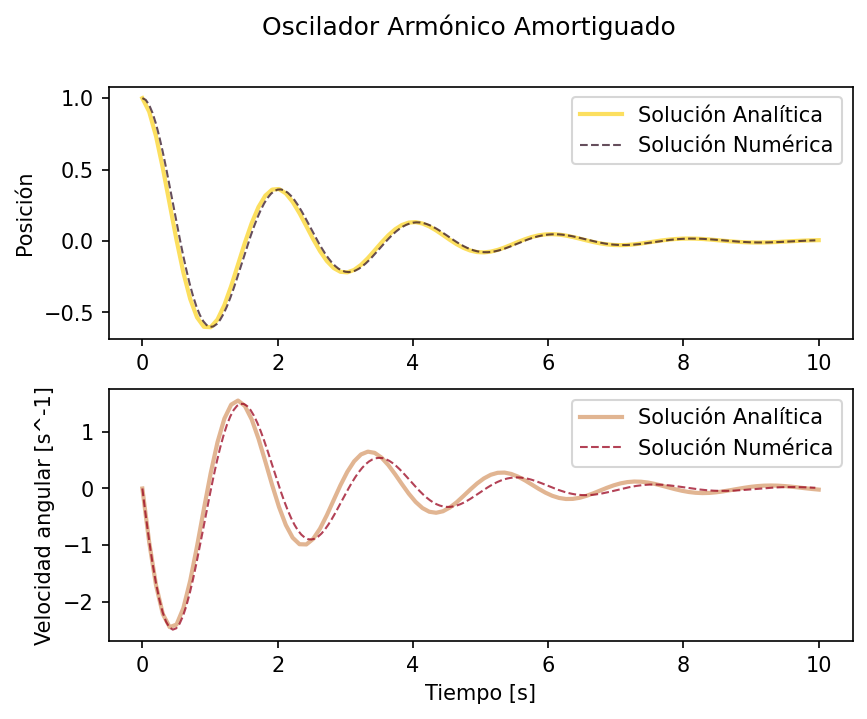

In [115]:
# Gráficos theta vs t y omega vs t


cond_iniciales=[ theta, omega]

t_span = (t_i,t_f)
t_eval = np.arange(t_i,t_f,0.05)


result2_solve_ivp = solve_ivp(Oscilador_Armonico_Amortiguado, t_span, y0=cond_iniciales, t_eval=t_eval, args=p2)


print(result2_solve_ivp)


# ## Solución Analítica

t_analitica = np.linspace(t_i,t_f,100)
theta_analitica_amortiguada = Solucion_Analitica_Amortiguada(t_analitica, Omega,theta_0,phi,q )
omega_analitica_amortiguada = Solucion_Analitica_Amortiguada_omega(t_analitica, Omega,theta_0,phi,q)


## Gráficos por solución numérica

fig, (ax, ax1) = plt.subplots(2, 1, dpi=150)

ax.plot(t_analitica,theta_analitica_amortiguada, label="Solución Analítica" , color="#FCDC4D", linewidth=2, alpha=0.9)
ax.plot(result2_solve_ivp.t,result2_solve_ivp.y[0,:], label="Solución Numérica", color="#321325", alpha=0.75,linewidth=1, linestyle="dashed")
ax.set_ylabel("Posición")
ax.legend(loc="best")


ax1.plot(t_analitica, omega_analitica_amortiguada, label="Solución Analítica" , color="#D89C6E", linewidth=2, alpha=0.75)
ax1.plot(result2_solve_ivp.t,result2_solve_ivp.y[1,:], label="Solución Numérica", color="#9A031E", alpha=0.75,linewidth=1, linestyle="dashed")
ax1.set_ylabel("Velocidad angular [s^-1]")
ax1.set_xlabel("Tiempo [s]")
ax1.legend(loc="best")


plt.suptitle("Oscilador Armónico Amortiguado")
plt.show


4. Finalmente, genere el diagrama de fase del OAA, es decir, grafique $\dot\theta~vs~\theta$. **Valor: 2 puntos**

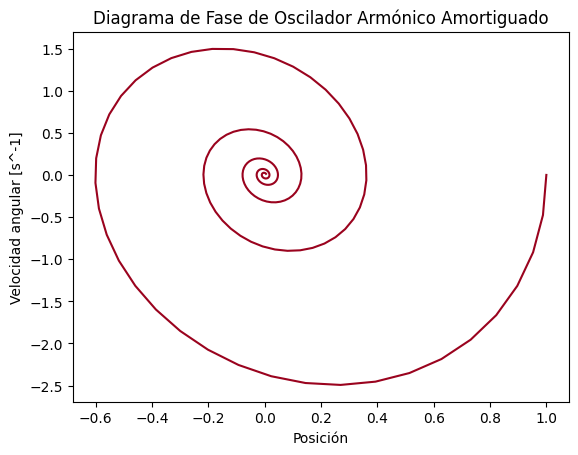

In [105]:
# Diagrama de fase

plt.plot(result2_solve_ivp.y[0,:],result2_solve_ivp.y[1,:], color="#9A031E")
plt.title("Diagrama de Fase de Oscilador Armónico Amortiguado")
plt.xlabel("Posición")
plt.ylabel("Velocidad angular [s^-1]")
plt.show()

Y como vemos, se parece al logo de Debian 

## Referencias

* Giordano, N.; Nakanishi, H. (2006). _Computational Physics, 2ª ed_. Estados Unidos: Pearson Education
* Thornton, S.; Marion, J. (2004). _Classical Dynamics of Particles and Systems, 5th ed_. Estados Unidos.